In [ ]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model

# Datos electorales del 2014

0.996554777066467 R^2
0.6333356502128051 pendiente -2294.852542610908 intercepto


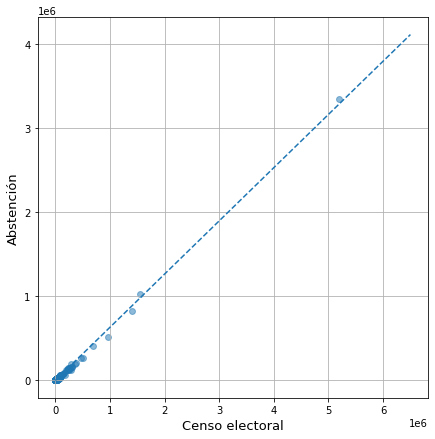

In [ ]:
df = pd.read_csv("/camara2014.csv", delimiter="	")
#Video sklearn min 4
Y14 = np.array(df["Abstención"])
columns = ['Censo electoral']
X14 = np.array(df[columns])
#Video regresion min 6
regresion14 = sklearn.linear_model.LinearRegression()
regresion14.fit(X14,Y14)
a14, b14 = regresion14.coef_, regresion14.intercept_
#Para graf de regresion lineal
x14Reg = np.linspace( 0.0, 6.5e6, 1000 )
fig = plt.figure(figsize=(7.0,7.0))
plt.plot(x14Reg,(a14*x14Reg)+(b14), '--')
plt.scatter( X14, Y14, s=35.0, alpha=0.5)
plt.xlabel("Censo electoral", size=13.0)
plt.ylabel("Abstención", size=13.0)
plt.grid()
print(regresion14.score(X14.reshape(-1,1),Y14),"R^2")
print(a14[0], "pendiente",b14, "intercepto")

0.938189887318333 R^2
0.6333356502128051 pendiente -2294.852542610908 intercepto


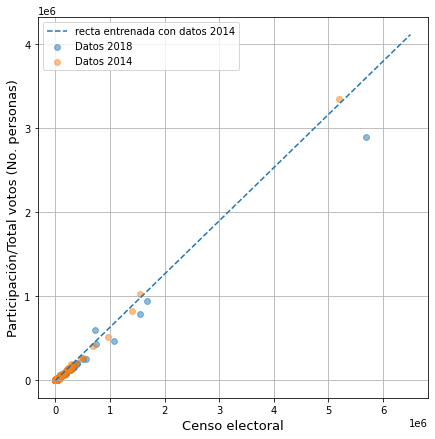

In [ ]:
DF18= pd.read_csv("/camara2018.csv", delimiter="	")
X18=np.array(DF18[DF18.keys()[3]])
Y18=np.array(DF18[DF18.keys()[5]])
fig2 = plt.figure(figsize=(7.0,7.0))
plt.scatter(X18,Y18,s=35.0, alpha=0.5,label="Datos 2018")
plt.scatter( X14, Y14, s=35.0, alpha=0.5,label="Datos 2014")
Y18_P=regresion14.predict(X18.reshape(-1,1))
print(regresion14.score(X18.reshape(-1,1),Y18),"R^2")
print(a14[0], "pendiente",b14, "intercepto")
plt.xlabel("Censo electoral", size=13.0)
plt.ylabel("Participación/Total votos (No. personas)", size=13.0)
plt.grid()
plt.plot( x14Reg, (a14[0]*x14Reg)+(b14), '--',label="recta entrenada con datos 2014")
plt.legend()

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'año 2014, r^2=0.7')

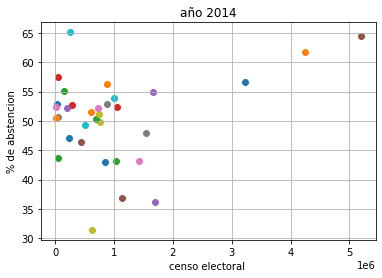

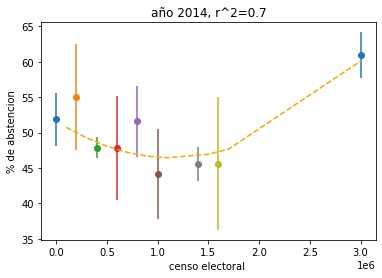

In [205]:
df = pd.read_csv("/camara2014.csv", delimiter="	")
ganadores=df[df.keys()[2]]
partidos=np.unique(ganadores)
poblacion=np.zeros(len(partidos))
abstensionl=np.zeros(len(partidos))
g=0
plt.title("año 2014")
plt.xlabel("censo electoral ")
plt.ylabel("% de abstencion")
dic14={}
for i in partidos:
  ii=ganadores==i
  h="%Abstención"
  abstension=df[h][ii]
  poblacion[g]=df[df.keys()[3]][ii].sum()
  abstensionl[g]=abstension[ii].mean()
  plt.scatter(df[df.keys()[3]][ii].sum(),abstension[ii].mean())
  g=g+1
dx=10
abstensiond=np.zeros(dx+1)
poblaciond=np.zeros(dx+1)
sigma_obs=np.zeros(dx+1)
plt.grid()
plt.figure()
print(len(abstensionl))
for k in range(dx):
  conteo=[]
  for j in range(len(poblacion)):
        if poblacion[j] >= 2e6*k/dx and poblacion[j]<=2e6*(k+1)/dx:
          conteo.append(abstensionl[j])
          try:
              dic14[k].append(abstensionl[j])
          except:
              dic14[k]=[]
              dic14[k].append(abstensionl[j])
              
  abstensiond[k]=np.array(conteo).mean()
  if  len(conteo)>0:
    poblaciond[k]= 2e6*(k+0.5)/dx
    abstensiond[k]=np.array(conteo).mean()
    sigma_obs[k]=np.array(conteo).std()
  plt.scatter(k*2e6/dx,np.array(conteo).mean())
  plt.errorbar(k*2e6/dx,np.array(conteo).mean(),np.array(conteo).std())
jj=poblacion>=2e6
abstensiond[dx]=abstensionl[jj].mean()
sigma_obs[dx]=abstensionl[jj].std()
poblaciond[dx]=3e6
poblaciond=poblaciond/1000000
plt.scatter(3e6,abstensionl[jj].mean())
plt.grid()
plt.errorbar(3e6,abstensionl[jj].mean(),abstensionl[jj].std())
abstensiond = np.array([x for x in abstensiond if np.isnan(x) == False])-50
sigma_obs = np.array([x for x in sigma_obs if x !=0])
poblaciond = np.array([x for x in poblaciond if x !=0])
plt.plot( poblaciond*1e6,modelo(poblaciond, m_prom, b_prom,c_prom)+50, '--', color="orange", label="MCMC" )

plt.xlabel("censo electoral ")
plt.ylabel("% de abstencion")
plt.grid()
from sklearn.metrics import r2_score
r2=r2_score(abstensiond, modelo(poblaciond, m_prom, b_prom,c_prom))
plt.title("año 2014, r^2={}".format(round(r2,2)))

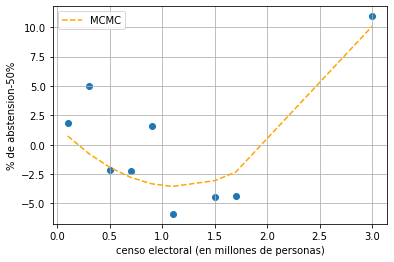

In [206]:
#No ejecutar
def modelo(x_obs, m, b,c):
    return c*x_obs*x_obs+x_obs * m+ b
def loglikelihood(x_obs, y_obs, sigma_obs, m, b,c):
    y_modelo = modelo(x_obs, m, b,c)
    x = -0.5*np.sum(((y_modelo - y_obs)/sigma_obs)**2)
    return x
n_iteraciones = 50000
m_walk = np.zeros(n_iteraciones)
b_walk = np.zeros(n_iteraciones)
c_walk = np.zeros(n_iteraciones)
s_step=0.09 #0.09 re

for i in range(1,n_iteraciones):
    m_prime = np.random.normal(m_walk[i-1],s_step)
    b_prime = np.random.normal(b_walk[i-1],s_step)
    c_prime = np.random.normal(c_walk[i-1],s_step)

    l_now = loglikelihood(poblaciond, abstensiond , sigma_obs, m_walk[i-1], b_walk[i-1],c_walk[i-1])
    l_next = loglikelihood(poblaciond, abstensiond ,sigma_obs, m_prime, b_prime,c_prime)
    #print(l_now, l_next)
    gamma = np.min([1.0, np.exp(l_next-l_now)])
    #print(gamma)
    
    alpha = np.random.random()
    if alpha<gamma:
        m_walk[i] = m_prime
        b_walk[i] = b_prime
        c_walk[i] = c_prime
    else:
        m_walk[i] = m_walk[i-1]
        b_walk[i] = b_walk[i-1]
        c_walk[i] = c_walk[i-1]

m_prom, b_prom, c_prom=np.mean(m_walk), np.mean(b_walk) ,np.mean(c_walk)
print("m_prom=", m_prom, "; b_prom=", b_prom,";c_prom",c_prom)

_ = plt.scatter(poblaciond, abstensiond )
_ = plt.plot( poblaciond,modelo(poblaciond, m_prom, b_prom,c_prom), '--', color="orange", label="MCMC" )
plt.legend(loc=0)
plt.xlabel("censo electoral (en millones de personas)")
plt.ylabel("% de abstension-50%")
plt.grid()

|


3.1491400825891804


Text(0.5, 1.0, 'c=3.96 +/- $\\sigma$=1.02')

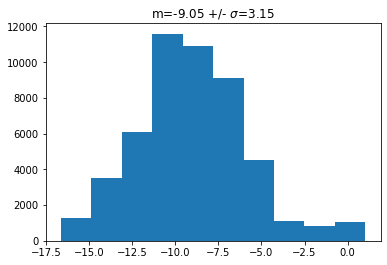

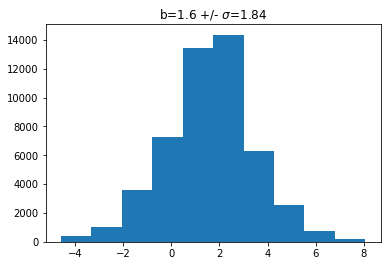

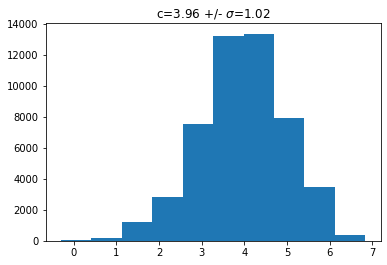

In [ ]:
plt.figure()
plt.hist(m_walk)
print(m_walk.std())
plt.title("m={} +/- $\sigma$={}".format(round(m_walk.mean(),2),round(m_walk.std(),2)))
plt.figure()
plt.hist(b_walk)
plt.title("b={} +/- $\sigma$={}".format(round(b_walk.mean(),2),round(b_walk.std(),2)))
plt.figure()
plt.hist(c_walk)
plt.title("c={} +/- $\sigma$={}".format(round(c_walk.mean(),2),round(c_walk.std(),2)))


34
[  1.83046898   4.31243902  -2.15858333   0.89496647  -0.1823648
 -13.21333333  -6.82543478  -2.00862069  -4.39814843  10.94199492] [0.1 0.3 0.5 0.9 1.1 1.3 1.5 1.7 1.9 3. ]
10 10 8


Text(0.5, 1.0, 'año 2018, r^2=0.54')

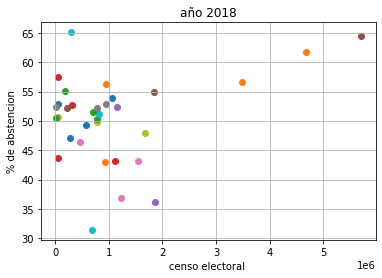

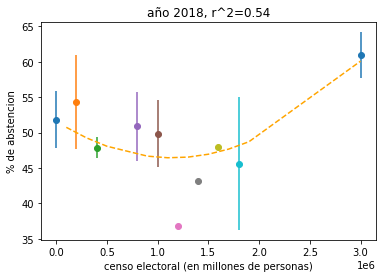

In [201]:
ganadores=DF18[DF18.keys()[2]]
partidos=np.unique(ganadores)
poblacion=np.zeros(len(partidos))
abstensionl=np.zeros(len(partidos))
plt.xlabel("censo electoral ")
plt.ylabel("% de abstencion")
g=0
dic18={}
for i in partidos:
  ii=ganadores==i
  h="%Abstención"
  abstension=df[h][ii]
  poblacion[g]=DF18[DF18.keys()[3]][ii].sum()
  abstensionl[g]=abstension[ii].mean()
  plt.scatter(DF18[DF18.keys()[3]][ii].sum(),abstension[ii].mean())
  g=g+1
dx=10
abstensiond=np.zeros(dx+1)
poblaciond=np.zeros(dx+1)
sigma_obs=np.zeros(dx+1)
plt.title("año 2018")
plt.grid()
plt.figure()
print(len(abstensionl))
for k in range(dx):
  conteo=[]
  for j in range(len(poblacion)):
        if poblacion[j] >= 2e6*k/dx and poblacion[j]<=2e6*(k+1)/dx:
            conteo.append(abstensionl[j])
            abstensiond[dx]=np.array(conteo).mean()
            try:
              dic18[k].append(abstensionl[j])
            except:
              dic18[k]=[]
              dic18[k].append(abstensionl[j])
  if  len(conteo)>0:
    poblaciond[k]= 2e6*(k+0.5)/dx
    abstensiond[k]=np.array(conteo).mean()
    sigma_obs[k]=np.array(conteo).std()
  plt.scatter(k*2e6/dx,np.array(conteo).mean())
  plt.errorbar(k*2e6/dx,np.array(conteo).mean(),np.array(conteo).std())
jj=poblacion>=2e6
abstensiond[dx]=abstensionl[jj].mean()
sigma_obs[dx]=abstensionl[jj].std()
poblaciond[dx]=3e6
poblaciond=poblaciond/1000000
plt.scatter(3e6,abstensionl[jj].mean())
plt.errorbar(3e6,abstensionl[jj].mean(),abstensionl[jj].std())
abstensiond = np.array([x for x in abstensiond if x !=0])-50
sigma_obs = np.array([x for x in sigma_obs if x !=0])
poblaciond = np.array([x for x in poblaciond if x !=0])
gg=poblaciond!=0.7
poblaciond=poblaciond[gg]
abstensiond= abstensiond[gg]
print(abstensiond,poblaciond)
print(len(abstensiond),len(poblaciond),len(sigma_obs ))

plt.xlabel("censo electoral ")
plt.ylabel("% de abstencion")
plt.plot( poblaciond*1e6,modelo(poblaciond, m_prom, b_prom,c_prom)+50, '--', color="orange", label="MCMC" )
plt.grid()
plt.xlabel("censo electoral (en millones de personas)")
plt.ylabel("% de abstencion")
plt.grid()
r2=r2_score(abstensiond, modelo(poblaciond, m_prom, b_prom,c_prom))
plt.title("año 2018, r^2={}".format(round(r2,2)))

  

# Implementación del método de cadenas de Markov con Monte Carlo (MCMC) para datos del 2018:

## P(parametros|obs) aprox P(obs|parametros)

## P(m,b | obs) aprox P(obs | m,b)

# PREGUNTA(S): ¿Es mayor la proporción o porcentaje de abstención en las cuidades que en los pueblos? (estableciendo que un lugar es una ciudad para una población mayor o igual a cierto valor escogido. Dicho valor de población mínima para ciudad podría escogerse como ciertas desviaciones estándar por encima del promedio de habitantes 2. tambien preguntar definición de ciudad.)

# Implementación del método de cadenas de Markov con Monte Carlo (MCMC) con datos del 2014:

## P(parametros|obs) aprox P(obs|parametros)

## P(m,b | obs) aprox P(obs | m,b)

## Con Candenas de Markov y Monte Carlo se hayan parametros del modelo  P(mod|datos) aprox P(datos|mod)

In [ ]:
sigma_obs=1.0e6 #sigma_obs=Y14.std()
def modelo(x_obs, m, b):
    return (x_obs * m) + b

print(sigma_obs)

1000000.0


In [ ]:
def loglikelihood(x_obs, y_obs, sigma_obs, m, b):
    y_modelo = modelo(x_obs, m, b)
    x = -0.5*np.sum(((y_modelo - y_obs)/sigma_obs)**2)
    return x

In [ ]:
n_iteraciones = 100000
m_walk = np.zeros(n_iteraciones)
b_walk = np.zeros(n_iteraciones)
tamSalto=10.0e6
m_walk[0]=0.63
b_walk[0]=-2200

for i in range(1,n_iteraciones):
    m_prime = np.random.normal(m_walk[i-1],tamSalto)
    b_prime = np.random.normal(b_walk[i-1],tamSalto)    
    l_now = loglikelihood(X14, Y14, sigma_obs, m_walk[i-1], b_walk[i-1])
    l_next = loglikelihood(X14, Y14, sigma_obs, m_prime, b_prime)
    #print(l_now, l_next)
    gamma = np.min([1.0, np.exp(l_next-l_now)])
    #print(gamma)
    
    alpha = np.random.random()
    if alpha<gamma:
        m_walk[i] = m_prime
        b_walk[i] = b_prime
    else:
        m_walk[i] = m_walk[i-1]
        b_walk[i] = b_walk[i-1]

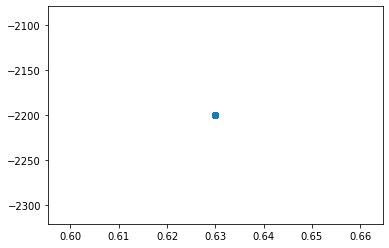

In [ ]:
#Vemos el camino de los parametros del modelo lineal
plt.plot(m_walk, b_walk, 'o-')

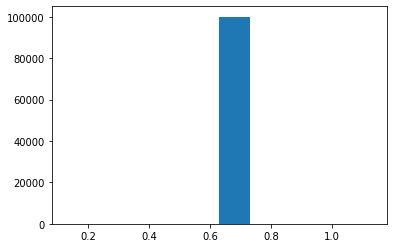

In [ ]:
_ = plt.hist(m_walk)

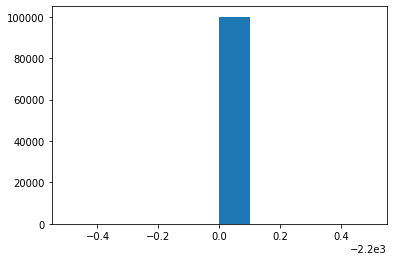

In [ ]:
_ = plt.hist(b_walk)

m_prom= 0.63 ; b_prom= -2200.0
a14(m)= [0.63333565] ; b14(b)= -2294.852542610908


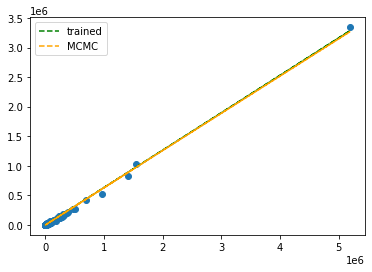

In [ ]:
m_prom, b_prom=np.mean(m_walk), np.mean(b_walk)
print("m_prom=", m_prom, "; b_prom=", b_prom)
print("a14(m)=", a14, "; b14(b)=", b14)

_ = plt.scatter( X14, Y14 )
_ = plt.plot( X14, ( a14*X14 )+( b14 ), '--', color="green", label="trained" )
_ = plt.plot( X14, ( m_prom*X14 )+( b_prom ), '--', color="orange", label="MCMC" )
plt.legend(loc=0)

## Ahora, para abstencion Vs censo electoral por municipio/ciudad 

In [ ]:
# solo la primera potencia porque en 0 debe dar cero
def modeloPotencia(n, x):
  return x**n

In [ ]:
n_iteraciones = 10000
m_walk = np.zeros(n_iteraciones)
b_walk = np.zeros(n_iteraciones)
sigma_obs=0.1

for i in range(1,n_iteraciones):
    m_prime = np.random.normal(m_walk[i-1],0.1)
    b_prime = np.random.normal(b_walk[i-1],0.1)    
    l_now = loglikelihood(X14, Y14, sigma_obs, m_walk[i-1], b_walk[i-1])
    l_next = loglikelihood(X14, Y14, sigma_obs, m_prime, b_prime)
    #print(l_now, l_next)
    gamma = np.min([1.0, np.exp(l_next-l_now)])
    #print(gamma)
    
    alpha = np.random.random()
    if alpha<gamma:
        m_walk[i] = m_prime
        b_walk[i] = b_prime
    else:
        m_walk[i] = m_walk[i-1]
        b_walk[i] = b_walk[i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


Test 2022

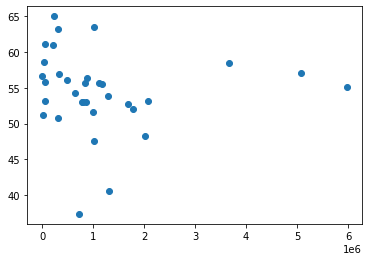

df22.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'año 2022, r^2=-0.84')

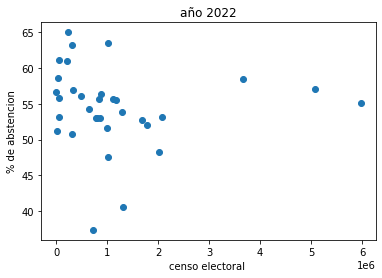

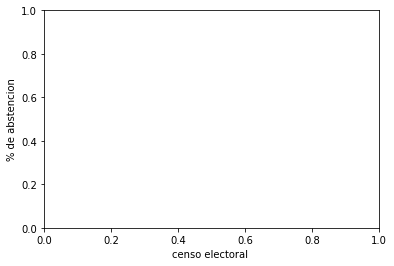

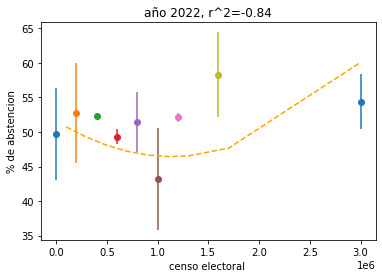

In [203]:
df22= pd.read_csv("/abstenciondep2022.csv")
oo=df22["%participacion"]!=14.15
abstencionl=abs(df22["%participacion"][oo]-100.0)
plt.title("año 2022")
poblacion=(df22["votantes"][oo]*100/df22["%participacion"][oo])
plt.xlabel("censo electoral ")
plt.ylabel("% de abstencion")
plt.scatter(poblacion,abstencionl)
abstensiond=np.zeros(dx+1)
poblaciond=np.zeros(dx+1)
sigma_obs=np.zeros(dx+1)
plt.figure()

plt.xlabel("censo electoral ")
plt.ylabel("% de abstencion")
plt.figure()
dic22={}
for k in range(dx):
  conteo=[]
  b=0
  for j in poblacion:
        if j >= 2e6*k/dx and j<=2e6*(k+1)/dx:
            conteo.append(abstensionl[b])
            try:
              dic22[k].append(abstensionl[b])
            except:
              dic22[k]=[]
              dic22[k].append(abstensionl[b])
        b=b+1
       
            
  if  len(conteo)>0:
    poblaciond[k]= 2e6 *(k+0.5)/dx
    abstensiond[k]=np.array(conteo).mean()
    sigma_obs[k]=np.array(conteo).std()
  plt.scatter(k*2e6/dx,np.array(conteo).mean())
  plt.errorbar(k*2e6/dx,np.array(conteo).mean(),np.array(conteo).std())
jj=poblacion>=2e6
abstensiond[dx]=abstencionl[jj].mean()
sigma_obs[dx]=abstencionl[jj].std()
poblaciond[dx]=3e6
poblaciond=poblaciond/1000000
plt.scatter(3e6,abstencionl[jj].mean())
plt.errorbar(3e6,abstencionl[jj].mean(),abstencionl[jj].std())
abstensiond = np.array([x for x in abstensiond if x !=0])-50
sigma_obs = np.array([x for x in sigma_obs if x !=0])
poblaciond = np.array([x for x in poblaciond if x !=0])
plt.plot( poblaciond*1e6,modelo(poblaciond, m_prom, b_prom,c_prom)+50, '--', color="orange", label="MCMC" )
plt.grid()
plt.xlabel("censo electoral ")
plt.ylabel("% de abstencion")
plt.grid()
r2=r2_score(abstensiond, modelo(poblaciond, m_prom, b_prom,c_prom))
plt.title("año 2022, r^2={}".format(round(r2,2)))

Bootstrapping


In [207]:
def bootstraping(arr1,arr2,k1,k2):
  precios=np.concatenate((arr1,arr2), axis=0)
  real_diff=np.mean(arr1)-np.mean(arr2)
  n_iteraciones= 50000
  diffs=np.zeros(n_iteraciones)
  n_b=len(arr1)
  n_m=len(arr2)
  for i in range(n_iteraciones):
      np.random.shuffle(precios)
      b=precios[:n_b]
      m=precios[n_b:]
    # print(np.mean(precios), np.mean(b))
      diffs[i]=np.mean(b)-np.mean(m)
      frac_altos= np.count_nonzero(diffs>real_diff)/len(diffs)
      return frac_altos,frac_altos>0.05,k1,k2


In [208]:
for i in dic14.keys():
  print("intervalo :"+str((int(i))*2e6/dx)+"-"+str((int(i)+1)*2e6/dx))
  for j in dic14.keys():
    if j!=i:
      p_value,igual,k1,k2 = bootstraping(dic14[i],dic14[j],i,j)
      if igual:
        print(p_value,";",str(int(int(k2)*2e6/dx))+"-"+str(int(int(k2+1)*2e6/dx)))





intervalo :0.0-200000.0
0.99998 ; 200000-400000
intervalo :200000.0-400000.0
intervalo :400000.0-600000.0
1.0 ; 0-200000
1.0 ; 200000-400000
0.99998 ; 800000-1000000
intervalo :600000.0-800000.0
0.99998 ; 0-200000
1.0 ; 200000-400000
0.99998 ; 400000-600000
1.0 ; 800000-1000000
intervalo :800000.0-1000000.0
0.99998 ; 0-200000
1.0 ; 200000-400000
intervalo :1000000.0-1200000.0
1.0 ; 0-200000
1.0 ; 200000-400000
0.99998 ; 400000-600000
1.0 ; 600000-800000
1.0 ; 800000-1000000
0.99998 ; 1400000-1600000
0.99998 ; 1600000-1800000
intervalo :1400000.0-1600000.0
1.0 ; 0-200000
1.0 ; 200000-400000
1.0 ; 400000-600000
0.99998 ; 600000-800000
1.0 ; 800000-1000000
0.99998 ; 1600000-1800000
intervalo :1600000.0-1800000.0
1.0 ; 0-200000
1.0 ; 200000-400000
1.0 ; 400000-600000
1.0 ; 600000-800000
1.0 ; 800000-1000000


In [ ]:
for i in dic18.keys():
  print("intervalo :"+str((int(i))*2e6/dx)+"-"+str((int(i)+1)*2e6/dx))
  for j in dic18.keys():
    if j!=i:
      p_value,igual,k1,k2 = bootstraping(dic18[i],dic18[j],i,j)
      if igual:
        print(p_value,";",str(int(k2)*2e6/dx)+"-"+str(int(k2+1)*2e6/dx))

intervalo :0.0-200000.0
0.9999 ; 200000.0-400000.0
intervalo :200000.0-400000.0
intervalo :400000.0-600000.0
1.0 ; 0.0-200000.0
1.0 ; 200000.0-400000.0
1.0 ; 800000.0-1000000.0
0.9999 ; 1000000.0-1200000.0
0.9999 ; 1600000.0-1800000.0
intervalo :600000.0-800000.0
intervalo :800000.0-1000000.0
1.0 ; 0.0-200000.0
1.0 ; 200000.0-400000.0
intervalo :1000000.0-1200000.0
1.0 ; 0.0-200000.0
1.0 ; 200000.0-400000.0
1.0 ; 800000.0-1000000.0
intervalo :1200000.0-1400000.0
0.9999 ; 0.0-200000.0
1.0 ; 200000.0-400000.0
1.0 ; 400000.0-600000.0
1.0 ; 800000.0-1000000.0
1.0 ; 1000000.0-1200000.0
0.9999 ; 1400000.0-1600000.0
1.0 ; 1600000.0-1800000.0
1.0 ; 1800000.0-2000000.0
intervalo :1400000.0-1600000.0
1.0 ; 0.0-200000.0
1.0 ; 200000.0-400000.0
1.0 ; 400000.0-600000.0
0.9999 ; 800000.0-1000000.0
1.0 ; 1000000.0-1200000.0
0.9999 ; 1600000.0-1800000.0
0.9999 ; 1800000.0-2000000.0
intervalo :1600000.0-1800000.0
1.0 ; 0.0-200000.0
1.0 ; 200000.0-400000.0
1.0 ; 800000.0-1000000.0
1.0 ; 1000000.0-120000

In [ ]:
for i in dic22.keys():
  print("intervalo :"+str((int(i))*2e6/dx)+"-"+str((int(i)+1)*2e6/dx))
  for j in dic22.keys():
    if j!=i:
      p_value,igual,k1,k2 = bootstraping(dic22[i],dic22[j],i,j)
      if igual:
        print(p_value,";",str(int(k2)*2e6/dx)+"-"+str(int(k2+1)*2e6/dx))

intervalo :0.0-200000.0
1.0 ; 200000.0-400000.0
0.9999 ; 400000.0-600000.0
1.0 ; 800000.0-1000000.0
1.0 ; 1000000.0-1200000.0
1.0 ; 1600000.0-1800000.0
intervalo :200000.0-400000.0
0.9999 ; 1600000.0-1800000.0
intervalo :400000.0-600000.0
0.9999 ; 200000.0-400000.0
1.0 ; 1600000.0-1800000.0
intervalo :600000.0-800000.0
1.0 ; 0.0-200000.0
1.0 ; 200000.0-400000.0
0.9999 ; 400000.0-600000.0
1.0 ; 800000.0-1000000.0
1.0 ; 1000000.0-1200000.0
1.0 ; 1200000.0-1400000.0
1.0 ; 1600000.0-1800000.0
intervalo :800000.0-1000000.0
1.0 ; 200000.0-400000.0
1.0 ; 400000.0-600000.0
0.9999 ; 1000000.0-1200000.0
1.0 ; 1600000.0-1800000.0
intervalo :1000000.0-1200000.0
1.0 ; 200000.0-400000.0
0.9999 ; 400000.0-600000.0
1.0 ; 1600000.0-1800000.0
intervalo :1200000.0-1400000.0
0.9999 ; 0.0-200000.0
0.9999 ; 200000.0-400000.0
1.0 ; 400000.0-600000.0
0.9999 ; 800000.0-1000000.0
1.0 ; 1000000.0-1200000.0
1.0 ; 1600000.0-1800000.0
intervalo :1600000.0-1800000.0
